In [1]:
import pandas as pd
import zipfile

# Define path to the zip file
zip_path = 'fr.openfoodfacts.org.products.csv.zip'

# Define path to the csv file you want to extract
csv_path = 'fr.openfoodfacts.org.products.csv'

unzip = False

# Open and extract the csv file
if unzip:
    with zipfile.ZipFile(zip_path, 'r') as zfile:
        zfile.extract(csv_path)

# Now we can read the extracted csv file into a DataFrame
df = pd.read_csv(csv_path, delimiter="\t", low_memory=False)

# Drop 100% missing values
df.dropna(how="all", axis="columns", inplace=True)

columns = df.columns.to_list()

for col in columns:

    # assuming df is your DataFrame and 'column1' is your column
    missing_values_count = df[col].isnull().sum()
    total_values = len(df[col])

    if missing_values_count / total_values > 0.5:
        print(f"More than 50% of the values in {col} are missing.")
        df.drop(col, axis="columns", inplace=True)

    else:
        print(f"Less than or equal to 50% of the values in {col} are missing.")
        

Less than or equal to 50% of the values in code are missing.
Less than or equal to 50% of the values in url are missing.
Less than or equal to 50% of the values in creator are missing.
Less than or equal to 50% of the values in created_t are missing.
Less than or equal to 50% of the values in created_datetime are missing.
Less than or equal to 50% of the values in last_modified_t are missing.
Less than or equal to 50% of the values in last_modified_datetime are missing.
Less than or equal to 50% of the values in product_name are missing.
More than 50% of the values in generic_name are missing.
More than 50% of the values in quantity are missing.
More than 50% of the values in packaging are missing.
More than 50% of the values in packaging_tags are missing.
Less than or equal to 50% of the values in brands are missing.
Less than or equal to 50% of the values in brands_tags are missing.
More than 50% of the values in categories are missing.
More than 50% of the values in categories_tags 

In [2]:
df

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,Ferme t'y R'nao,ferme-t-y-r-nao,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0,14.0
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,torn-glasser,...,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,grizzlies,...,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0,12.0
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,Bob's Red Mill,bob-s-red-mill,...,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,openfoodfacts-contributors,1490631299,2017-03-27T16:14:59Z,1491244498,2017-04-03T18:34:58Z,Tomato & ricotta,Panzani,panzani,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,http://world-fr.openfoodfacts.org/produit/9956...,usda-ndb-import,1489059076,2017-03-09T11:31:16Z,1491244499,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",Trader Joe's,trader-joe-s,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00000,0.000,0.0,0.0
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,tomato,1422099377,2015-01-24T11:36:17Z,1491244499,2017-04-03T18:34:59Z,乐吧泡菜味薯片,乐吧,乐吧,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980...,openfoodfacts-contributors,1492340089,2017-04-16T10:54:49Z,1492340089,2017-04-16T10:54:49Z,Tomates aux Vermicelles,Knorr,knorr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from scipy import stats
import numpy as np


# load the data
#df = pd.read_csv('data.csv')  # replace 'data.csv' with your file path

# define relevant variables
relevant_variables = df.columns.to_list()  # replace these with your variables
variables = df.columns.to_list()

# create an imputer object for numeric and categorical columns
numeric_imputer = SimpleImputer(strategy='mean')  # or choose another strategy like 'mean'
categorical_imputer = SimpleImputer(strategy='most_frequent')

for column in variables:
    missing_values_count = df[column].isnull().sum()
    total_values = len(df[column])
    if missing_values_count / total_values > 0.5:
        print(f"More than 50% of the values in '{column}' are missing.")
        if pd.api.types.is_numeric_dtype(df[column]):
            df[column] = numeric_imputer.fit_transform(df[column].values.reshape(-1, 1))
        else:
            df[column] = categorical_imputer.fit_transform(df[column].values.reshape(-1, 1))
    else:
        print(f"Less than or equal to 50% of the values in '{column}' are missing.")



"""
# create a function to automate the cleaning process
def clean_data(df, variables):
    for column in variables:
        missing_values_count = df[column].isnull().sum()
        total_values = len(df[column])
        if missing_values_count / total_values > 0.5:
            print(f"More than 50% of the values in '{column}' are missing.")
            if df[column].dtype == np.number:
                df[column] = numeric_imputer.fit_transform(df[column].values.reshape(-1, 1))
            else:
                df[column] = categorical_imputer.fit_transform(df[column].values.reshape(-1, 1))
        else:
            print(f"Less than or equal to 50% of the values in '{column}' are missing.")

    # handle outliers using the Z-score method for numeric columns only
    numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
    z_scores = stats.zscore(df[numeric_columns])
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < 3).all(axis=1)
    df = df[filtered_entries]

    return df
    """

# call the function to clean the data
#df_clean = clean_data(df, relevant_variables)


# Univariate Analaysis

In [5]:
df.describe()

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,248939.000000,248939.000000,248939.000000,2.611130e+05,243891.000000,229554.000000,243588.000000,244971.000000,200886.000000,259922.000000,255510.000000,255463.000000,221210.000000,221210.000000
mean,1.936024,0.019659,0.055246,1.141915e+03,12.730379,5.129932,32.073981,16.003484,2.862111,7.075940,2.028624,0.798815,9.165535,9.058049
std,2.502019,0.140524,0.269207,6.447154e+03,17.578747,8.014238,29.731719,22.327284,12.867578,8.409054,128.269454,50.504428,9.055903,9.183589
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-17.860000,-6.700000,-800.000000,0.000000,0.000000,-15.000000,-15.000000
25%,0.000000,0.000000,0.000000,3.770000e+02,0.000000,0.000000,6.000000,1.300000,0.000000,0.700000,0.063500,0.025000,1.000000,1.000000
50%,1.000000,0.000000,0.000000,1.100000e+03,5.000000,1.790000,20.600000,5.710000,1.500000,4.760000,0.581660,0.229000,10.000000,9.000000
75%,3.000000,0.000000,0.000000,1.674000e+03,20.000000,7.140000,58.330000,24.000000,3.600000,10.000000,1.374140,0.541000,16.000000,16.000000
max,31.000000,2.000000,6.000000,3.251373e+06,714.290000,550.000000,2916.670000,3520.000000,5380.000000,430.000000,64312.800000,25320.000000,40.000000,40.000000


In [6]:
df.head(10)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,Ferme t'y R'nao,ferme-t-y-r-nao,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0,14.0
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,torn-glasser,...,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,grizzlies,...,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0,12.0
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,Bob's Red Mill,bob-s-red-mill,...,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN
5,0000000016100,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055651,2017-03-09T10:34:11Z,1489055651,2017-03-09T10:34:11Z,Breadshop Honey Gone Nuts Granola,Unfi,unfi,...,18.27,1.92,63.46,11.54,7.7,13.46,NaN,NaN,NaN,NaN
6,0000000016117,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055730,2017-03-09T10:35:30Z,1489055730,2017-03-09T10:35:30Z,Organic Long Grain White Rice,Lundberg,lundberg,...,NaN,NaN,80.00,NaN,NaN,8.89,NaN,NaN,NaN,NaN
7,0000000016124,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055711,2017-03-09T10:35:11Z,1489055712,2017-03-09T10:35:12Z,Organic Muesli,Daddy's Muesli,daddy-s-muesli,...,18.75,4.69,57.81,15.62,9.4,14.06,0.13970,0.055,7.0,7.0
8,0000000016193,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055651,2017-03-09T10:34:11Z,1489055651,2017-03-09T10:34:11Z,Organic Dark Chocolate Minis,Equal Exchange,equal-exchange,...,37.50,22.50,55.00,42.50,7.5,5.00,NaN,NaN,NaN,NaN
9,0000000016513,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055654,2017-03-09T10:34:14Z,1489055654,2017-03-09T10:34:14Z,Organic Sunflower Oil,Napa Valley Naturals,napa-valley-naturals,...,100.00,7.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df[['nutrition_grade_fr' , 'energy_100g']].describe()

,energy_100g
count,2.611130e+05
mean,1.141915e+03
std,6.447154e+03
min,0.000000e+00
25%,3.770000e+02
50%,1.100000e+03
75%,1.674000e+03
max,3.251373e+06


In [ ]:
df[df['energy_100g']]

In [17]:
df.dropna(subset=['energy_100g'], inplace=True)

In [19]:
import numpy as np 
ceiling = np.percentile(df['energy_100g'], q=75)

In [21]:
df_enery_filtered = df[df['energy_100g'] <= ceiling].copy()

array([[<Axes: title={'center': 'energy_100g'}>]], dtype=object)

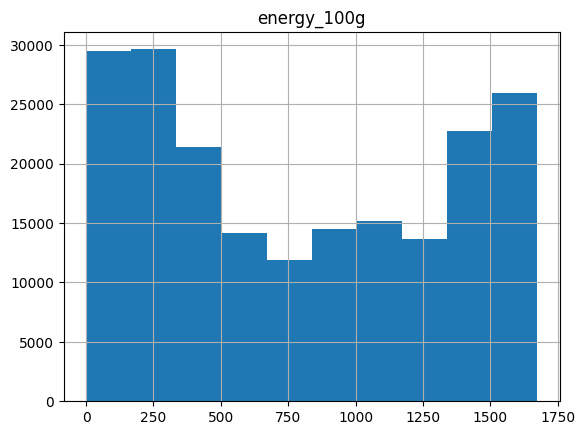

In [22]:
df_enery_filtered[['nutrition_grade_fr' , 'energy_100g']].hist()

# Notes 

- quantative ~ quantative
- quantative ~ qualataive
    - eta_squared, linear regression
- qualtative ~ qualitataive


PCA
- Statistics
- Visualisations

In [23]:
eta_squared

NameError: name 'eta_squared' is not defined

array([[<Axes: title={'center': 'energy_100g'}>]], dtype=object)

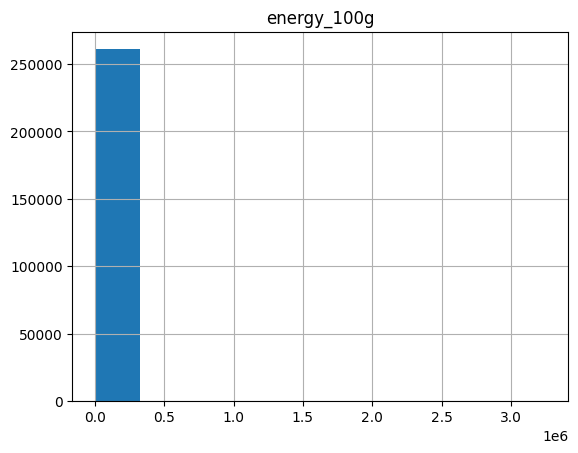

In [11]:
df[['nutrition_grade_fr' , 'energy_100g']].hist()

In [7]:
df.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'brands',
       'brands_tags', 'countries', 'countries_tags', 'countries_fr',
       'ingredients_text', 'serving_size', 'additives_n', 'additives',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'states', 'states_tags', 'states_fr', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g'],
      dtype='object')

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer, MissingIndicator
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import make_pipeline

# Define various imputers
numeric_imputers = {
    'median': SimpleImputer(strategy='median'),
    'mean': SimpleImputer(strategy='mean'),
    'constant': SimpleImputer(strategy='constant', fill_value=0),  # replace missing with 0
    'iterative': IterativeImputer(random_state=0),
    'knn': KNNImputer(n_neighbors=2),
    'random_forest': make_pipeline(MissingIndicator(), RandomForestRegressor(n_estimators=10, random_state=0))  # Note: this may take a while to run
}

categorical_imputers = {
    'most_frequent': SimpleImputer(strategy='most_frequent'),
    'constant': SimpleImputer(strategy='constant', fill_value='missing'),  # replace missing with a constant
    #'knn': make_pipeline(OrdinalEncoder(), KNNImputer(n_neighbors=2), OrdinalEncoder())  # OrdinalEncoder converts categories into integers
}

variables = df.columns.to_list()

for column in variables:
    missing_values_count = df[column].isnull().sum()
    total_values = len(df[column])

    if pd.api.types.is_numeric_dtype(df[column]):
        # Apply each of the imputation strategies for numeric data
        for strategy_name, imputer in numeric_imputers.items():
            df[column + '_' + strategy_name] = imputer.fit_transform(df[[column]])
    else:
        # Apply each of the imputation strategies for categorical data
        for strategy_name, imputer in categorical_imputers.items():
            df[column + '_' + strategy_name] = imputer.fit_transform(df[[column]])

In [ ]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
z_scores = stats.zscore(df[numeric_columns])
z_scores

In [5]:
# handle outliers using the Z-score method for numeric columns only
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
z_scores = stats.zscore(df[numeric_columns])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]